In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)


In [3]:
X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [6]:
y_pred = model.predict(X_test)


In [7]:
print("Prediction 1:", model.predict([[6.1, 2.8, 4.7, 1.2]]))
print("Prediction 2:", model.predict([[7.7, 2.6, 6.9, 2.3]]))


Prediction 1: [1]
Prediction 2: [2]


C:\Users\sudha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sudha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [8]:
# Training Accuracy
train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
print("Training Accuracy:", train_acc)

# Testing Accuracy
test_acc = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", test_acc)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Training Accuracy: 0.9583333333333334
Testing Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



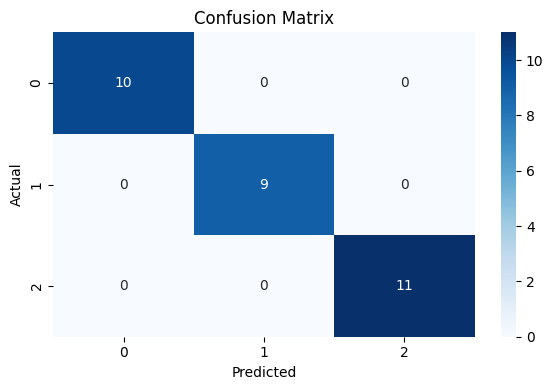

In [9]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


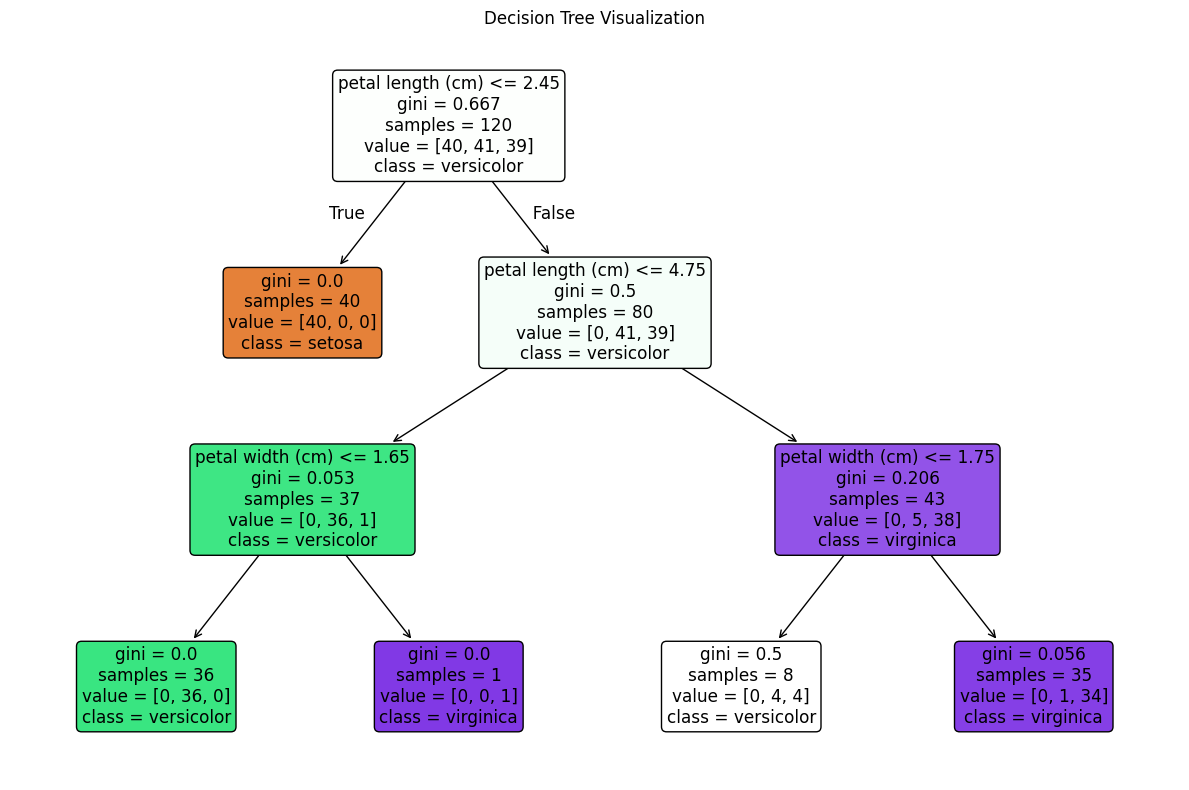

In [10]:
plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.tight_layout()
plt.show()


In [11]:
importances = model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importances)


Feature Importances:
              Feature  Importance
2  petal length (cm)    0.934626
3   petal width (cm)    0.065374
1   sepal width (cm)    0.000000
0  sepal length (cm)    0.000000


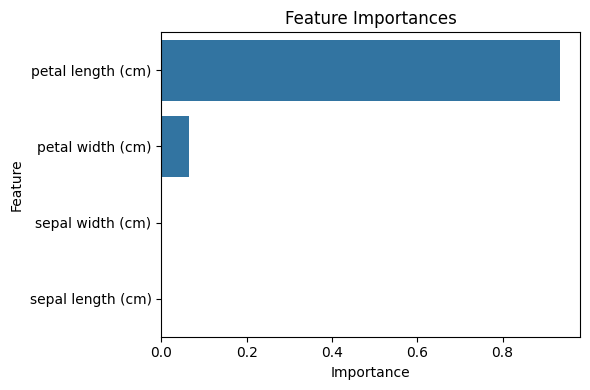

In [12]:
plt.figure(figsize=(6, 4))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title("Feature Importances")
plt.tight_layout()
plt.show()